In [ ]:
import numpy as np
import pandas as pd

import string

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv(r'spam 3.csv')
#df = pd.read_csv(r'C:\Users\Hp\Downloads\new_sm 1.csv')

df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:

spam=(df['Label']=='spam').sum()
print(f"total spam: {spam}")

ham=(df['Label']=='ham').sum()
print(f"total ham: {ham}")
df.head(10)

total spam: 747
total ham: 4825


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df['Label'].value_counts()

,count
Label,
ham,4825
spam,747


In [ ]:

# Download stopwords if not already available
nltk.download("stopwords")

# Initialize stopwords and stemmer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Define text preprocessing function
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()  # Tokenization (split into words)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [stemmer.stem(word) for word in words]  # Apply stemming
    return ' '.join(words)  # Rejoin words into processed text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


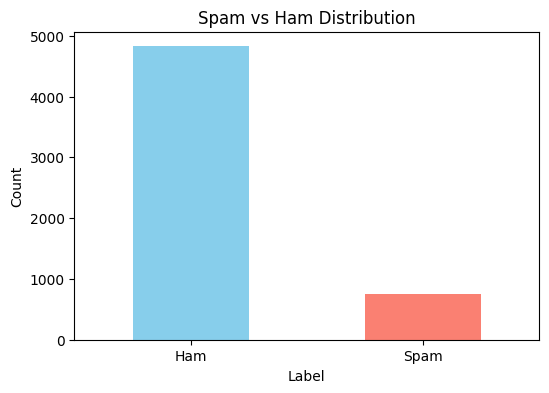

In [ ]:
label_counts = df['Label'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Spam vs Ham Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], rotation=0)
plt.show()

In [ ]:
print(df[['EmailText', 'Label']])


                                              EmailText Label
0     Go until jurong point, crazy.. Available only ...   ham
1                         Ok lar... Joking wif u oni...   ham
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam
3     U dun say so early hor... U c already then say...   ham
4     Nah I don't think he goes to usf, he lives aro...   ham
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...  spam
5568             Will Ã_ b going to esplanade fr home?   ham
5569  Pity, * was in mood for that. So...any other s...   ham
5570  The guy did some bitching but I acted like i'd...   ham
5571                         Rofl. Its true to its name   ham

[5572 rows x 2 columns]


In [ ]:
df['label_numeric'] =df['Label'].map({'spam': 1, 'ham': 0})
#df['label_numeric']
print(df[['EmailText', 'Label', 'label_numeric']])



                                              EmailText Label  label_numeric
0     Go until jurong point, crazy.. Available only ...   ham              0
1                         Ok lar... Joking wif u oni...   ham              0
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam              1
3     U dun say so early hor... U c already then say...   ham              0
4     Nah I don't think he goes to usf, he lives aro...   ham              0
...                                                 ...   ...            ...
5567  This is the 2nd time we have tried 2 contact u...  spam              1
5568             Will Ã_ b going to esplanade fr home?   ham              0
5569  Pity, * was in mood for that. So...any other s...   ham              0
5570  The guy did some bitching but I acted like i'd...   ham              0
5571                         Rofl. Its true to its name   ham              0

[5572 rows x 3 columns]


In [ ]:
keyword = "crazy"
count = df.query("EmailText.str.contains(@keyword, case=False)", engine='python')

print(count[['EmailText', 'Label', 'label_numeric']])
total_filtered_rows = len(count)
print("\n")

print(f'total found: {total_filtered_rows}')


                                              EmailText Label  label_numeric
0     Go until jurong point, crazy.. Available only ...   ham              0
1010  Lol I would but my mom would have a fit and te...   ham              0
1343  Crazy ar he's married. ÃÃ like gd looking gu...   ham              0
1667  So now my dad is gonna call after he gets out ...   ham              0
2801  And smile for me right now as you go and the w...   ham              0
2816  Gr8 Poly tones 4 ALL mobs direct 2u rply with ...  spam              1
2846  Free-message: Jamster!Get the crazy frog sound...  spam              1
2928  Where wuld I be without my baby? The thought a...   ham              0
3097           This is all just creepy and crazy to me.   ham              0
3750      Haha... Sounds crazy, dunno can tahan anot...   ham              0
3940  Free Msg: get Gnarls Barkleys \Crazy\" rington...  spam              1
4750  Your weekly Cool-Mob tones are ready to downlo...  spam              1

In [ ]:


documents = df['EmailText'].fillna('').astype(str)  # Handle null values and ensure text data



########
count_vectorizer = CountVectorizer(max_features=4000)
feature_train = count_vectorizer.fit_transform(documents)  # Fit and transform training data

feature_names = count_vectorizer.get_feature_names_out()  # Correct method for newer sklearn versions

tfidf_df = pd.DataFrame(feature_train.toarray(), columns=feature_names)

data = pd.concat([df, tfidf_df], axis=1)

data = pd.concat([df, tfidf_df], axis=1)


data.head(1)




,Label,EmailText,label_numeric,00,000,008704050406,01223585334,02,0207,02073162414,...,yr,yrs,yummy,yun,yunny,yuo,yup,zed,zindgi,zoe
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Make an explicit copy to avoid slicing issues
df = df.copy()

# Apply label encoding safely
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

# Drop duplicates
total = len(df)
df = df.drop_duplicates(keep='first')
after = len(df)

# Print the number of deleted values
deleted = total - after
print(f"Total deleted values = {deleted}")


Total deleted values = 403


In [ ]:
x=df['EmailText']
y=df['Label']

x_train , x_test ,y_train ,y_test=train_test_split(x,y,test_size=.3,random_state=42)


In [ ]:
x_train = x_train.fillna('')
x_test = x_test.fillna('')
tfidf1 = TfidfVectorizer()
feature = tfidf1.fit_transform(x_train)

#using SVM model to test
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(feature, y_train)

test_feature1 = tfidf1.transform(x_test)
y_pred_svm  = svm_model.predict(test_feature1)

# checking accuracy
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred_svm )
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}%')
print(f'Precision: {precision_svm}%')
print(f'Recall: {recall_svm}%')
print(f'F1-score: {f1_svm}%')

Accuracy: 0.9838813668600903%
Precision: 0.975609756097561%
Recall: 0.9090909090909091%
F1-score: 0.9411764705882353%


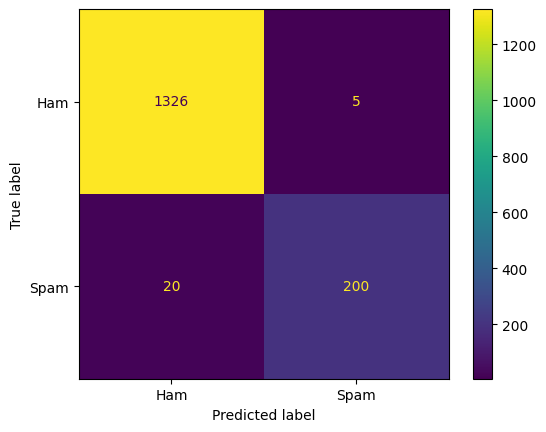

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Ham', 'Spam']).plot()

In [ ]:

nb_model = MultinomialNB()
nb_model.fit(feature, y_train)

test_feature = tfidf1.transform(x_test)
y_pred_nb = nb_model.predict(test_feature)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb}%')
print(f'Precision: {precision_nb}%')
print(f'Recall: {recall_nb}%')
print(f'F1-score: {f1_nb}%')


Accuracy: 0.9484203739522888%
Precision: 1.0%
Recall: 0.6363636363636364%
F1-score: 0.7777777777777778%


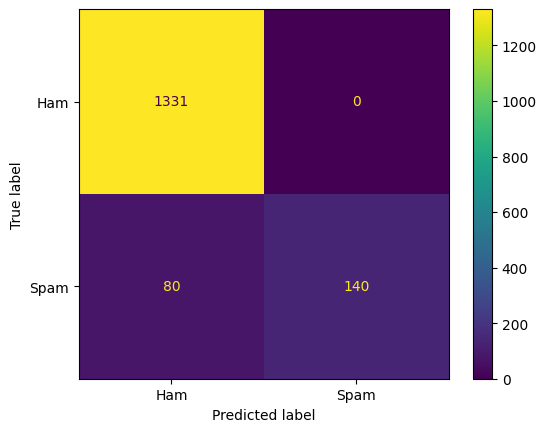

In [ ]:

cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Ham', 'Spam']).plot()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(feature, y_train)
y_pred_dt = model.predict(test_feature)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}%')
print(f'Precision: {precision_dt}%')
print(f'Recall: {recall_dt}%')
print(f'F1-score: {f1_dt}%')

Accuracy: 0.9568020631850419%
Precision: 0.8660287081339713%
Recall: 0.8227272727272728%
F1-score: 0.8438228438228438%


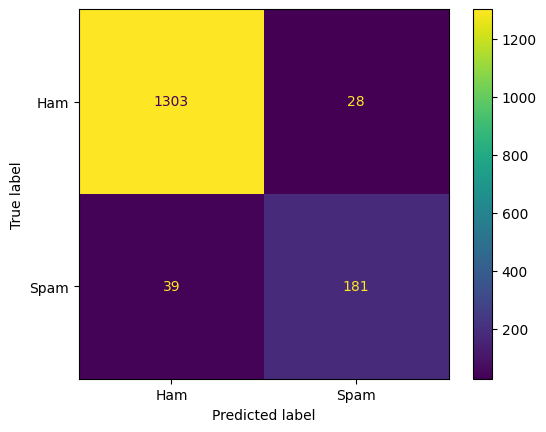

In [ ]:

cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Ham', 'Spam']).plot()

In [ ]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=1000, min_samples_split=150):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, x, y):
        if len(x) != len(y):
            raise ValueError("X and y must have the same length.")
        self.tree = self._build_tree(x, y, depth=0)

    def _entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def _split_data(self, X, y, feature, threshold):
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold
        return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

    def _best_split(self, X, y):
        best_criterion = float("inf")
        best_split = None
        n_samples, n_features = X.shape

        if n_features < 1:
            return None

        features_to_consider = np.random.choice(n_features, size=max(1, int(np.sqrt(n_features))), replace=False)

        for feature in features_to_consider:
            thresholds = np.sort(X[:, feature])
            thresholds = (thresholds[:-1] + thresholds[1:]) / 2
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split_data(X, y, feature, threshold)
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                criterion = (
                    (len(y_left) / len(y)) * self._entropy(y_left)
                    + (len(y_right) / len(y)) * self._entropy(y_right)
                )
                if criterion < best_criterion:
                    best_criterion = criterion
                    best_split = {
                        "feature": feature,
                        "threshold": threshold,
                        "X_left": X_left,
                        "X_right": X_right,
                        "y_left": y_left,
                        "y_right": y_right,
                    }
        return best_split

    def _build_tree(self, x, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1 or len(y) < self.min_samples_split:
            return {"type": "leaf", "class": np.argmax(np.bincount(y))}

        best_split = self._best_split(x, y)
        if not best_split:
            return {"type": "leaf", "class": np.argmax(np.bincount(y))}

        left_subtree = self._build_tree(best_split["X_left"], best_split["y_left"], depth + 1)
        right_subtree = self._build_tree(best_split["X_right"], best_split["y_right"], depth + 1)

        return {
            "type": "node",
            "feature": best_split["feature"],
            "threshold": best_split["threshold"],
            "left": left_subtree,
            "right": right_subtree,
        }

    def predict(self, x):
        if self.tree is None:
            raise ValueError("The model has not been trained. Call 'fit' before 'predict'.")

        def traverse(node, x_row):
            if node["type"] == "leaf":
                return node["class"]
            if x_row[node["feature"]] <= node["threshold"]:
                return traverse(node["left"], x_row)
            return traverse(node["right"], x_row)

        return np.array([traverse(self.tree, x_row) for x_row in x])


x, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Split the data into training and testing sets
feature, test_feature, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

# Initialize and train the new model
#model = ImprovedDecisionTree(max_depth=100, min_samples_split=15)
model.fit(feature, y_train)

# Make predictions and evaluate accuracy
y_pred_dt2 = model.predict(test_feature)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
precision_dt2 = precision_score(y_test, y_pred_dt2)
recall_dt2 = recall_score(y_test, y_pred_dt2)
f1_dt2 = f1_score(y_test, y_pred_dt2)

print(f'Accuracy: {accuracy_dt2}%')
print(f'Precision: {precision_dt2}')
print(f'Recall: {recall_dt2}')
print(f'F1-score: {f1_dt2}')



Accuracy: 0.9666666666666667%
Precision: 0.9473684210526315
Recall: 1.0
F1-score: 0.972972972972973


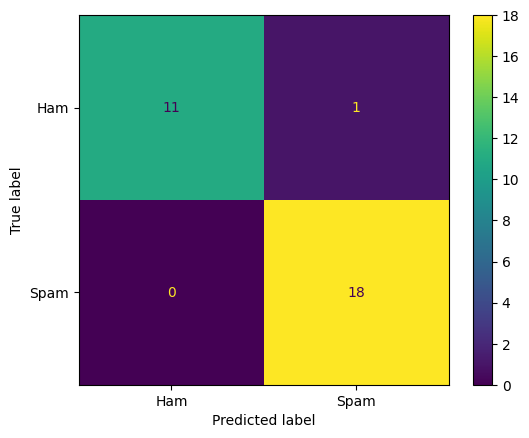

In [ ]:

cm_dt1 = confusion_matrix(y_test, y_pred_dt2)
ConfusionMatrixDisplay(confusion_matrix=cm_dt1, display_labels=['Ham', 'Spam']).plot()

In [ ]:
def classify_email(email_text, model, vectorizer, label_map={1: 'spam', 0: 'ham'}):

    email_feature = vectorizer.transform([email_text])
    predicted_label = model.predict(email_feature)
    return label_map[predicted_label[0]]

In [ ]:
new_email_1 = "Congratulations! You've won a free gift card. Click here to claim your prize."
result_1 = classify_email(new_email_1, svm_model, tfidf1)
print(f"Email: '{new_email_1}' is classified as: {result_1}")

Email: 'Congratulations! You've won a free gift card. Click here to claim your prize.' is classified as: spam


In [ ]:
new_email_2 = "Reminder: Your appointment is scheduled for tomorrow at 10 AM. Please confirm."
result_2 = classify_email(new_email_2, svm_model, tfidf1)
print(f"Email: '{new_email_2}' is classified as: {result_2}")


Email: 'Reminder: Your appointment is scheduled for tomorrow at 10 AM. Please confirm.' is classified as: ham


In [ ]:
new_email_2 = "Reminder: Your appointment is scheduled for tomorrow at 10 AM. Please confirm."
result_2 = classify_email(new_email_2, model, tfidf1)
print(f"Email: '{new_email_2}' is classified as: {result_2}")

ValueError: X has 7081 features, but DecisionTreeClassifier is expecting 5 features as input.

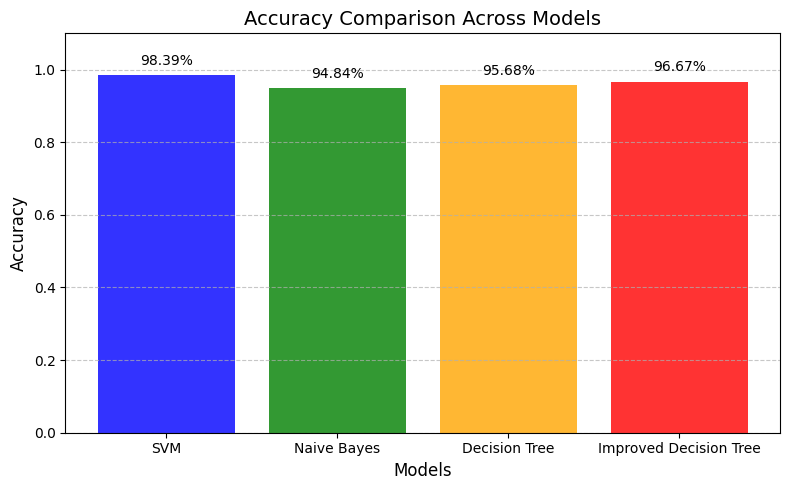

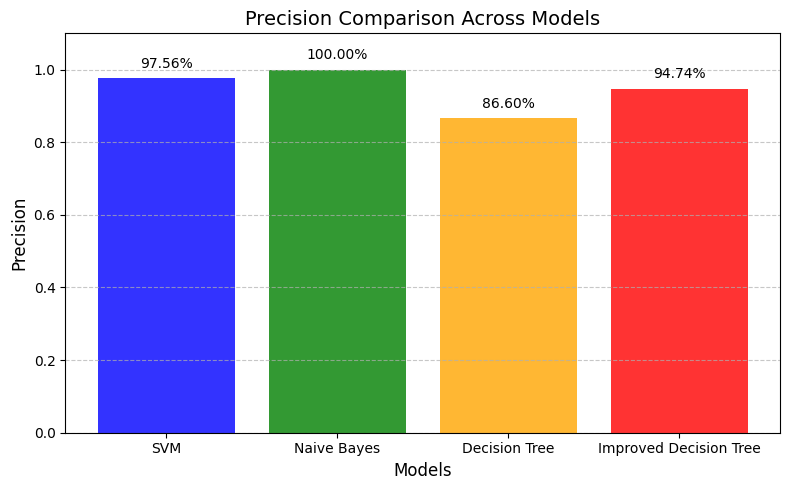

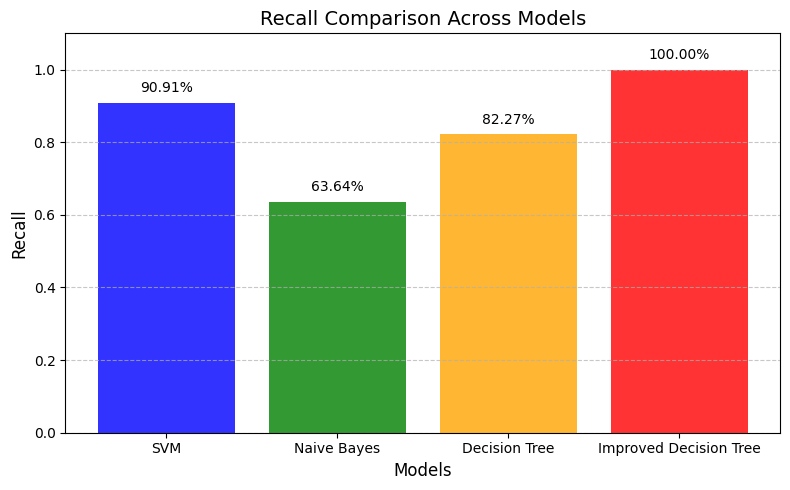

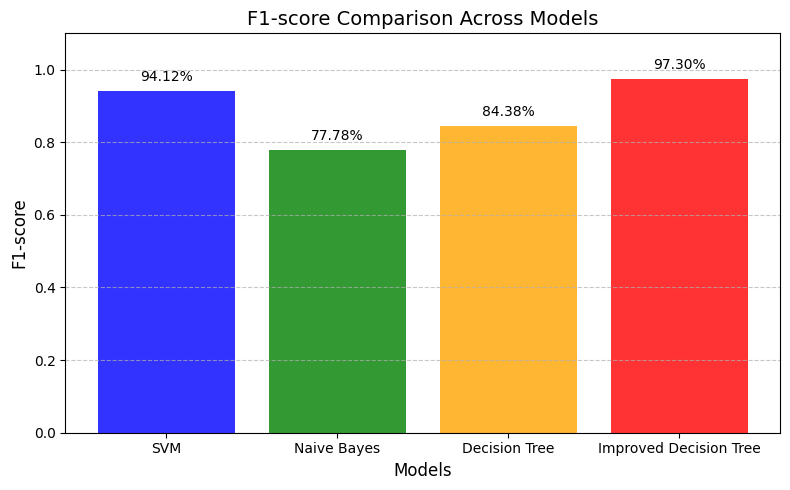

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
model_names = ['SVM', 'Naive Bayes', 'Decision Tree', 'Improved Decision Tree']
accuracy = [accuracy_svm, accuracy_nb, accuracy_dt, accuracy_dt2]
precision = [precision_svm, precision_nb, precision_dt, precision_dt2]
recall = [recall_svm, recall_nb, recall_dt, recall_dt2]
f1_score = [f1_svm, f1_nb, f1_dt, f1_dt2]

model_colors = ['blue', 'green', 'orange', 'red']



# Function to create individual charts with percentage on top of bars
def plot_metric_chart(metric_values, metric_name, color):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(model_names, metric_values, color=color, alpha=0.8)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.title(f'{metric_name} Comparison Across Models', fontsize=14)
    plt.ylim(0, 1.1)  # Assuming metric values are between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval*100:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot each chart with percentage on top of bars
plot_metric_chart(accuracy, 'Accuracy', model_colors )
plot_metric_chart(precision, 'Precision', model_colors )
plot_metric_chart(recall, 'Recall', model_colors )
plot_metric_chart(f1_score, 'F1-score', model_colors )

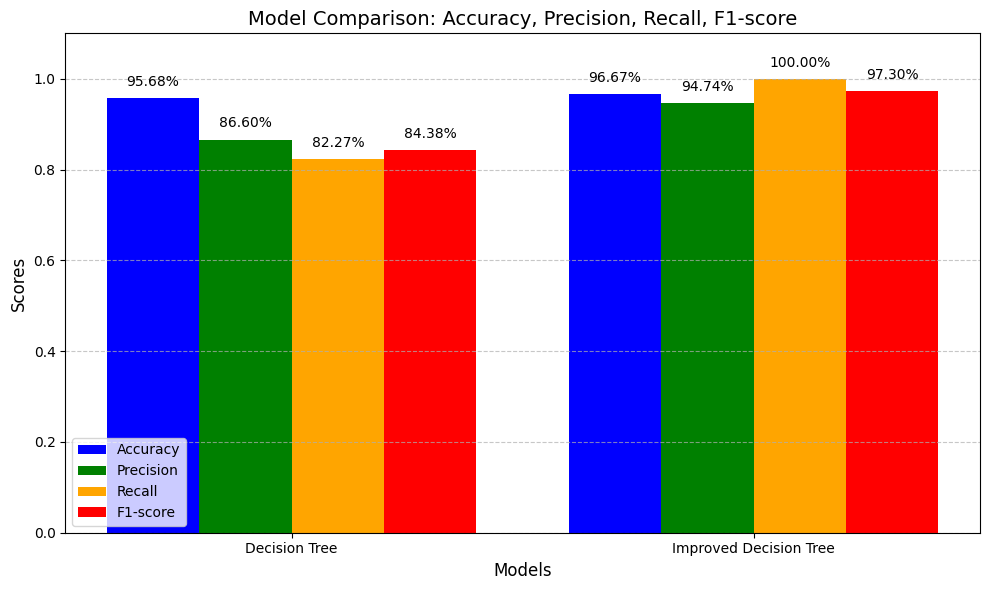

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model (add values for each metric)
model_names = ['Decision Tree', 'Improved Decision Tree']
accuracy = [accuracy_dt, accuracy_dt2]  # 2 values for 2 models
precision = [precision_dt, precision_dt2]  # 2 values for 2 models
recall = [recall_dt, recall_dt2]  # 2 values for 2 models
f1_score = [f1_dt, f1_dt2]  # 2 values for 2 models

# Width for bars
bar_width = 0.2
index = np.arange(len(model_names))

# Create figure and axes
plt.figure(figsize=(10, 6))

# Plot each metric as a grouped bar chart
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='green')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='orange')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-score', color='red')

# Add percentage labels on top of bars
for i in range(len(model_names)):
    plt.text(index[i], accuracy[i] + 0.02, f'{accuracy[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + bar_width, precision[i] + 0.02, f'{precision[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + 2 * bar_width, recall[i] + 0.02, f'{recall[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + 3 * bar_width, f1_score[i] + 0.02, f'{f1_score[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)

# Labeling the chart
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1-score', fontsize=14)
plt.xticks(index + 1.5 * bar_width, model_names)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pickle
pickle.dump(tfidf1,open('vectorizer.pkl','wb'))
pickle.dump(svm_model,open('model.pkl','wb'))
